In [1]:
##Clear the environment
rm(list=ls())

##Turn off scientific notations for numbers
options(scipen = 999)  

##Set locale
Sys.setlocale("LC_ALL", "English") 

##Set seed for reproducibility
set.seed(2345)

# Turn off warnings
options(warn = -1)

getstats <- function(cm){
  # Sensititvity a.k.a TPR
  tpr <-cm[2,2]/(cm[2,2]+cm[2,1])
  fpr <-cm[1,2]/(cm[1,2]+cm[1,1])
  
  # Specificity a.k.a. TNR
  tnr <- cm[1,1]/(cm[1,1]+cm[1,2])
  fnr <- cm[2,1]/(cm[2,1]+cm[2,2])
  
  # Calculate accuracy
  acc <-(cm[2,2]+cm[1,1])/sum(cm)
  err <-(cm[1,2]+cm[2,1])/sum(cm)
  
  #Precision - Positive Predictive Value
  ppv <- cm[2,2]/(cm[2,2]+cm[1,2])
  
  # Negative Predictive Value
  npv <- cm[1,1]/(cm[1,1]+cm[2,1])
  
  rbind(TruePos_Sensitivity=tpr, FalsePos=fpr, TrueNeg_Specificty=tnr, FalseNeg=fnr, PositivePredictiveValue=ppv, NegativePredictiveValue=npv, Accuracy = acc, Error = err)
}

# clean the data names and data
# Use: df<-cleanit(df)
cleanit <-function(df){
  names(df) <-tolower(names(df))
  names(df) <- gsub("\\(","",names(df))
  names(df) <- gsub("\\)","",names(df))
  names(df) <- gsub("\\.","",names(df))
  names(df) <- gsub("_","",names(df))
  names(df) <- gsub("-","",names(df))
  names(df) <- gsub(",","",names(df))
  return(df)
}


[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

In [2]:
animaldata <- read.csv("D:/Data/AnimalData.csv")

In [3]:
str(animaldata)
head(animaldata,10)

'data.frame':	473 obs. of  24 variables:
 $ Impound.No         : Factor w/ 473 levels "K12-000031","K12-000037",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Intake.Date        : Factor w/ 53 levels "1/1/12","1/15/12",..: 1 1 1 1 1 1 1 5 5 5 ...
 $ Intake.Type        : Factor w/ 4 levels "Euthanasia Request",..: 4 4 4 4 4 4 2 4 3 4 ...
 $ Animal.Type        : Factor w/ 2 levels "Cat","Dog": 2 2 2 2 2 2 2 2 2 2 ...
 $ Neutered.Status    : Factor w/ 3 levels "Intact","Neutered",..: 3 1 1 2 2 2 1 3 3 3 ...
 $ Sex                : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 2 1 1 1 ...
 $ Age.Intake         : int  10 3 2 0 3 5 2 1 1 6 ...
 $ Condition          : Factor w/ 2 levels "Injured or Sick",..: 1 2 2 2 1 2 2 2 1 2 ...
 $ Breed              : Factor w/ 143 levels "Am Pit Bull Ter ",..: 38 117 105 82 78 141 135 38 38 38 ...
 $ Aggressive         : Factor w/ 3 levels "","N","Y": 2 2 2 2 2 2 2 2 2 2 ...
 $ Independent        : Factor w/ 3 levels "","N","Y": 2 2 2 3 3 2 2 2 2 2 ...
 $ Intelligent

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,ellip.h,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
1,K12-000031,1/1/12,Stray,Dog,Spayed,Female,10,Injured or Sick,Chihuahua Sh Mix,N,<8b>,N,18,6,Toy,Tan & White,3.3,Heartworm Negative,1/7/12,Adoption,6
2,K12-000037,1/1/12,Stray,Dog,Intact,Female,3,Normal,Rat Terrier Mix,N,<8b>,Y,14,25,Terrier,White & Brown,7.5,No Lab Test,1/3/12,Return to Owner,2
3,K12-000108,1/1/12,Stray,Dog,Intact,Male,2,Normal,Pit Bull Mix,N,<8b>,Y,14,90,Terrier,Blue & White,74,Heartworm Negative,1/13/12,Humane Euthanasia,12
4,K12-000125,1/1/12,Stray,Dog,Neutered,Male,0,Normal,Labrador Retr & Border Collie,N,<8b>,Y,12,79,Sporting,White & Black,22,No Lab Test,1/8/12,Adoption,7
5,K12-000157,1/1/12,Stray,Dog,Neutered,Male,3,Injured or Sick,Labrador Retr,N,<8b>,Y,12,79,Sporting,Black & White,54,Heartworm Negative,4/4/12,Adoption,94
6,K12-000286,1/1/12,Stray,Dog,Neutered,Male,5,Normal,Yorkshire Terr,N,<8b>,Y,15,7,Terrier,Silver & Tan,4.8,Heartworm Negative,1/10/12,Return to Owner,9
7,K12-000291,1/1/12,Owner Surrender,Dog,Intact,Male,2,Normal,Weimaraner Mix,N,<8b>,Y,13,80,Sporting,Fawn & White,47,Heartworm Positive,1/26/12,Humane Euthanasia,25
8,K12-000384,1/8/12,Stray,Dog,Spayed,Female,1,Normal,Chihuahua Sh Mix,N,<8b>,N,18,6,Toy,White,10,Heartworm Negative,1/21/12,Transfer,13
9,K12-000416,1/8/12,Public Assist,Dog,Spayed,Female,1,Injured or Sick,Chihuahua Sh Mix,N,<8b>,N,18,6,Toy,Black & White,6,No Lab Test,1/20/12,Return to Owner,12
10,K12-000497,1/8/12,Stray,Dog,Spayed,Female,6,Normal,Chihuahua Sh Mix,N,<8b>,N,18,6,Toy,Tan & White,9.5,Heartworm Negative,1/22/12,Adoption,14


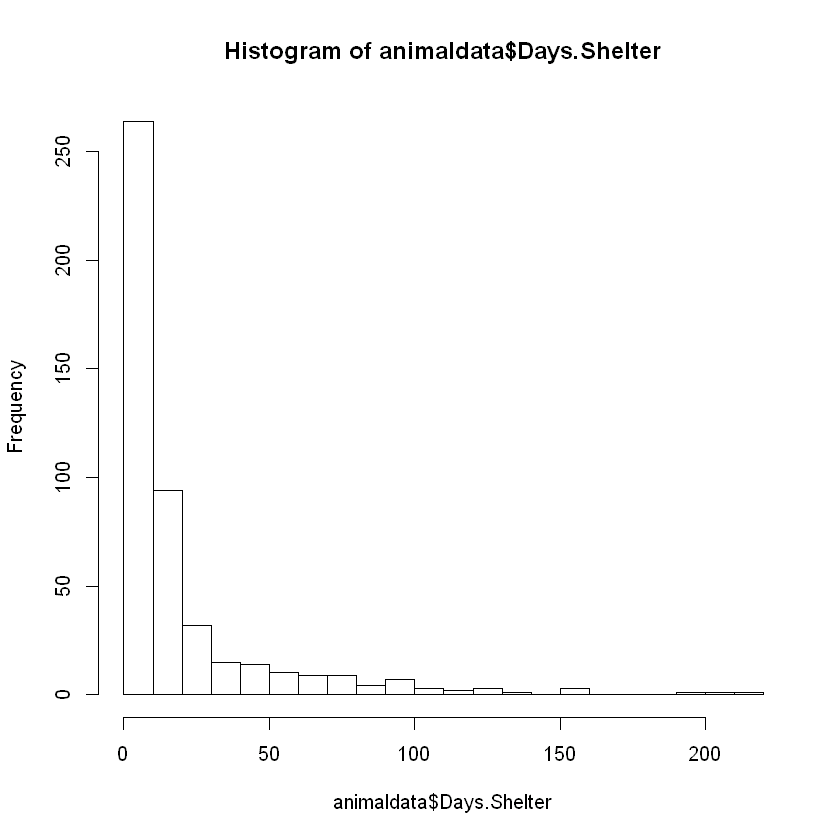

In [4]:
hist(animaldata$Days.Shelter,breaks=25)

In [6]:
#Find the number of animals that were adopted
table(animaldata$Outcome.Type)


         Adoption              Died Humane Euthanasia   Return to Owner 
              204                 3                39                73 
         Transfer 
              154 

In [7]:
#Pull out only adopted animals
adopted <- animaldata[animaldata$Outcome.Type=="Adoption",]

In [8]:
#Pull out just the days in shelter for the adopted animals
daystoadopt <- adopted$Days.Shelter

In [9]:
#Describe this variable
fivenum(daystoadopt)
mean(daystoadopt)
sd(daystoadopt)
median(daystoadopt)
IQR(daystoadopt)

[1]   2   8  13  38 211

[1] 29.26471

[1] 35.71547

[1] 13

[1] 29

In [10]:
#Find the row that contains the animal that took the longest to be adopted
which(animaldata$Days.Shelter==max(daystoadopt))
animaldata[425,]

[1] 425

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,ellip.h,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
425,K12-020743,11/18/12,Stray,Dog,Neutered,Male,2,Injured or Sick,Aust Cattle Dog & Labrador Retr,Y,<8b>,Y,16,35,Herding,White & Tan,48.25,Heartworm Negative,6/17/13,Adoption,211


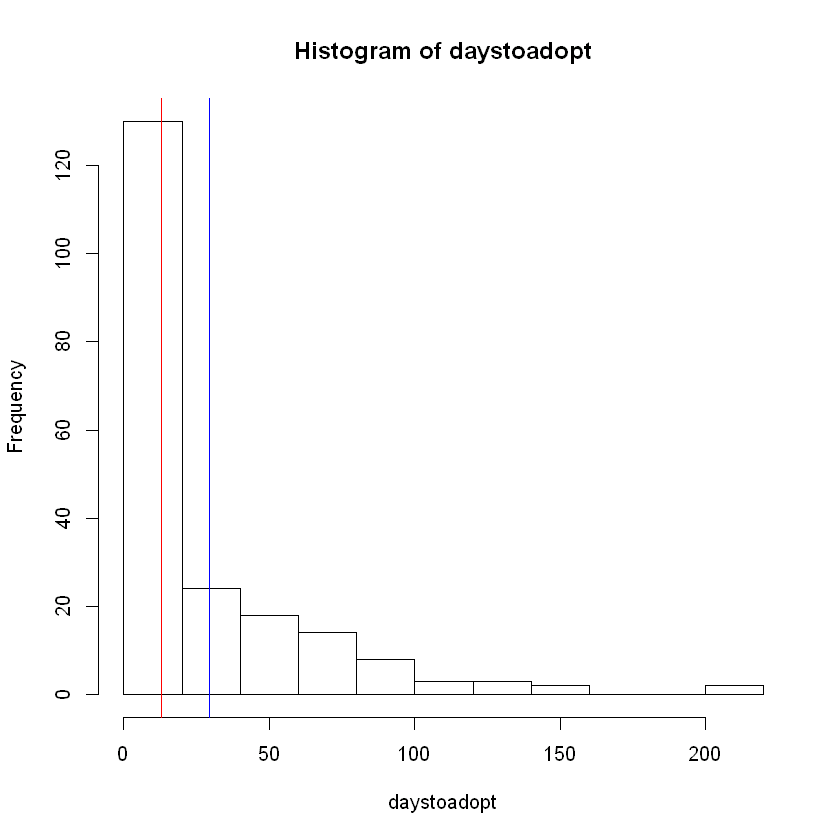

In [11]:
#Visualize this variable
hist(daystoadopt)
abline(v=median(daystoadopt),col="red")
abline(v=mean(daystoadopt),col="blue")

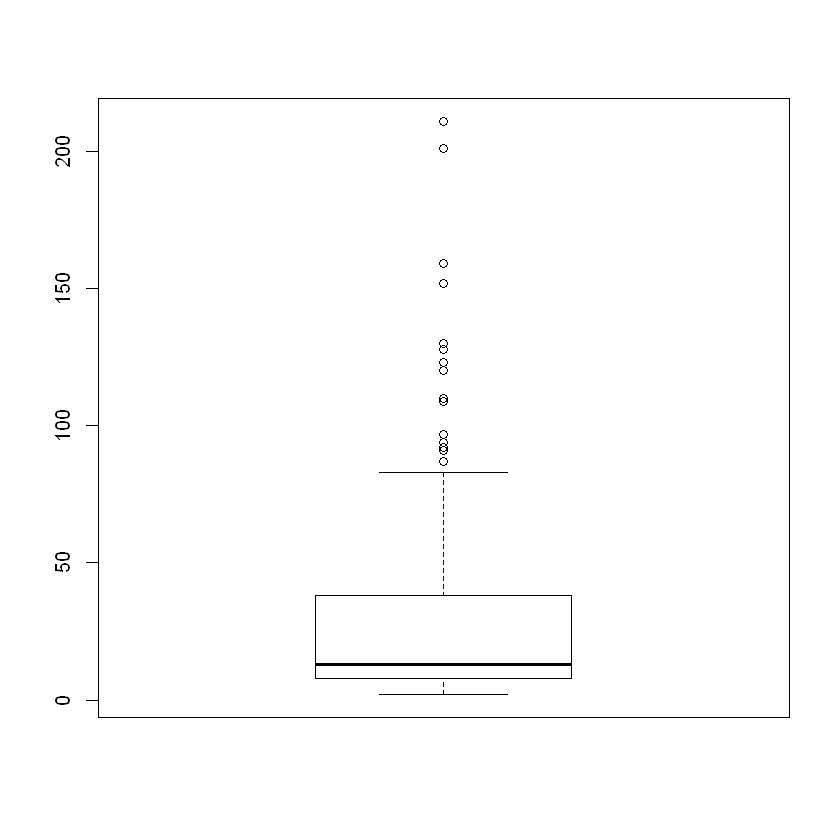

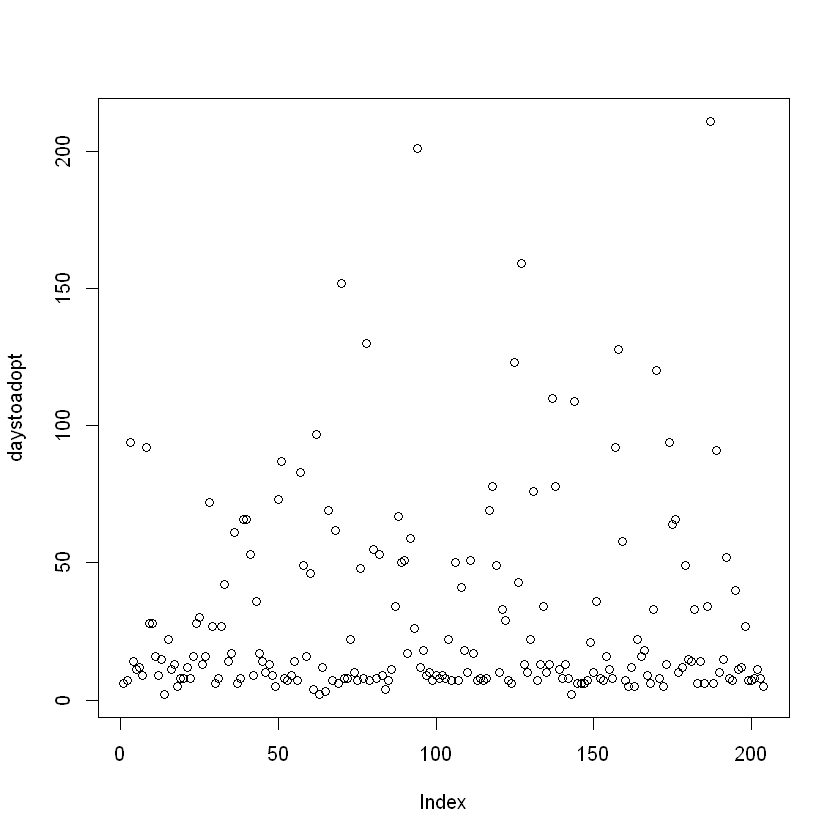

In [12]:
boxplot(daystoadopt)
plot(daystoadopt)

In [15]:
max(daystoadopt)
max(scale(daystoadopt))

[1] 211

[1] 5.08842

In [14]:
# Days the middle 50% of the distribution were adopted 
quantile(daystoadopt, c(.25,.75)) 

25% 75% 
  8  37

Primary Research Question

Compare the weight of adult cats and dogs at the shelter.  How typical would it be to find a 13-pound cat?  What about a 13-pound dog?

Analysis

Let’s break this question down into the different descriptive statistics that you will need to construct your answer.  Be sure that your R output includes all of the following components. 

1. Create a table to show how many adult (at intake) cats and dogs are in the dataset. An animal is considered an adult if it is at least one year of age. 
2. Make a histogram of weight for both adult dogs and cats. 
3. Calculate the appropriate measures of center and spread for each distribution.
4. Find the z-score for a 13-pound cat.
5. Find the quartile for a 13-pound dog.

In [18]:
#Find the number of animals that were adopted
table(animaldata$Age.Intake)


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  17 
191  63  63  38  22  32  13  13  11   8   5   3   3   5   2   1 

In [36]:
#Pull out only cats & dogs
dog <- animaldata[animaldata$Animal.Type=="Dog",]
cat <- animaldata[animaldata$Animal.Type=="Cat",]

adultdog <- dog[dog$Age.Intake>0,]
adultcat <- cat[cat$Age.Intake>0,]

In [39]:
table(dog$Age.Intake)
table(cat$Age.Intake)

table(adultdog$Age.Intake)
table(adultcat$Age.Intake)


 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 17 
65 56 46 30 16 28 11 11 10  4  4  1  2  5  1  1 


  0   1   2   3   4   5   6   7   8   9  10  11  12  15 
126   7  17   8   6   4   2   2   1   4   1   2   1   1 


 1  2  3  4  5  6  7  8  9 10 11 12 13 15 17 
56 46 30 16 28 11 11 10  4  4  1  2  5  1  1 


 1  2  3  4  5  6  7  8  9 10 11 12 15 
 7 17  8  6  4  2  2  1  4  1  2  1  1 

In [41]:
dim(adultdog)
dim(adultcat)

[1] 226  24

[1] 56 24

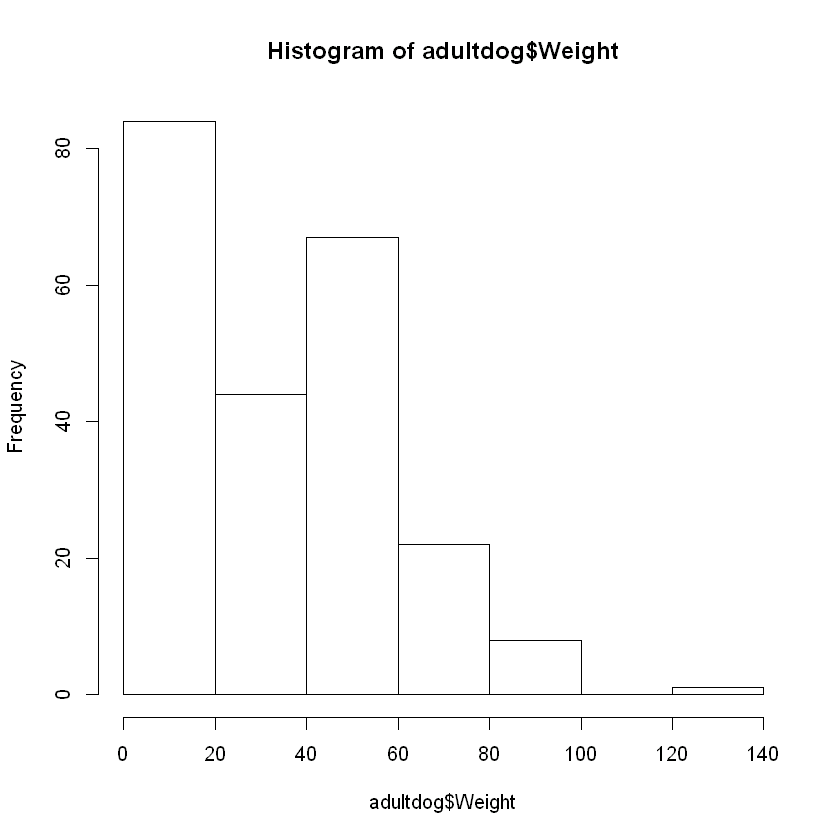

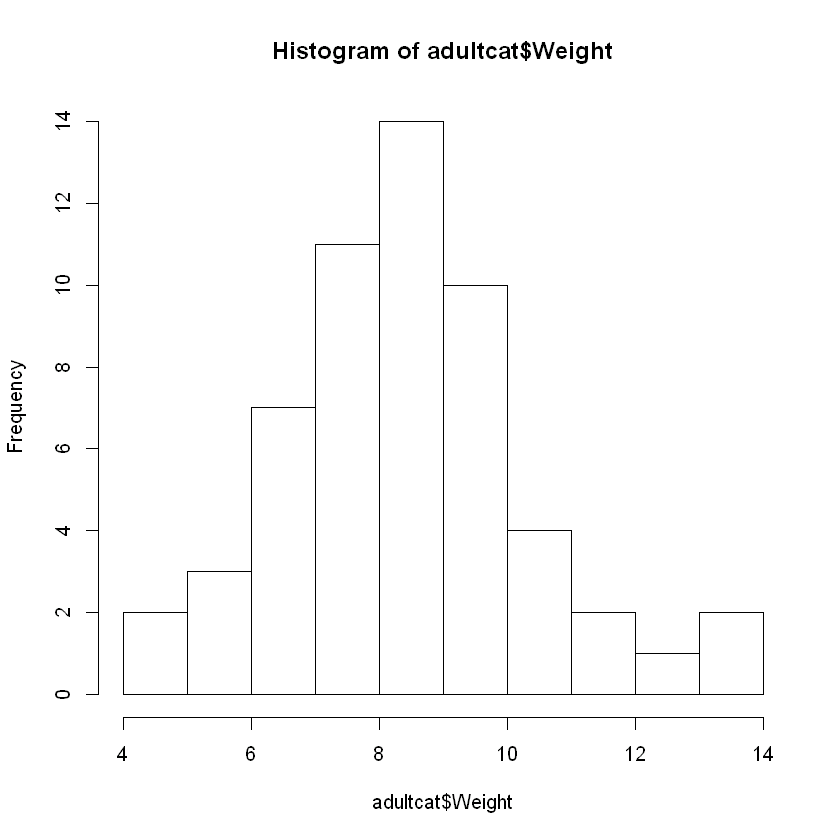

In [42]:
hist(adultdog$Weight)
hist(adultcat$Weight)

In [45]:
mean(adultcat$Weight)
sd(adultcat$Weight)

[1] 8.603571

[1] 1.911517

In [46]:
(13-mean(adultcat$Weight))/sd(adultcat$Weight)


[1] 2.299969

In [47]:
1-pnorm(2.29996869276786)

[1] 0.010725

In [48]:
fivenum(adultdog$Weight)

[1]   3.30  13.50  35.25  54.00 131.00

In [55]:
quantile(adultdog$Weight)
IQR(adultdog$Weight)
mean(adultdog$Weight)
median(adultdog$Weight)
sd(adultdog$Weight)

0%     25%     50%     75%    100% 
  3.300  13.500  35.250  53.875 131.000

[1] 40.375

[1] 35.67035

[1] 35.25

[1] 23.46612

In [57]:
quantile(adultcat$Weight)
IQR(adultcat$Weight)
mean(adultcat$Weight)
median(adultcat$Weight)
sd(adultcat$Weight)

0%   25%   50%   75%  100% 
 4.75  7.45  8.50  9.75 13.50

[1] 2.3

[1] 8.603571

[1] 8.5

[1] 1.911517

Problem Set

In [66]:
margin.table(animaldata$Intake.Type)

ERROR: Error in margin.table(animaldata$Intake.Type): 'x' is not an array


In [68]:
addmargins(table(animaldata$Intake.Type))


Euthanasia Request    Owner Surrender      Public Assist              Stray 
                 1                129                 23                320 
               Sum 
               473 

In [70]:
129/81

[1] 0.2727273

In [91]:
owner<- animaldata[animaldata$Intake.Type=="Owner Surrender",]

In [92]:
addmargins(table(owner$Outcome.Type))


         Adoption              Died Humane Euthanasia   Return to Owner 
               60                 0                16                 3 
         Transfer               Sum 
               50               129 

In [95]:
3/129
str(owner)

[1] 0.02325581

'data.frame':	129 obs. of  24 variables:
 $ Impound.No         : Factor w/ 473 levels "K12-000031","K12-000037",..: 7 14 16 17 19 21 25 29 32 38 ...
 $ Intake.Date        : Factor w/ 53 levels "1/1/12","1/15/12",..: 1 2 2 2 2 2 3 3 4 22 ...
 $ Intake.Type        : Factor w/ 4 levels "Euthanasia Request",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Animal.Type        : Factor w/ 2 levels "Cat","Dog": 2 1 2 1 1 2 1 2 2 2 ...
 $ Neutered.Status    : Factor w/ 3 levels "Intact","Neutered",..: 1 3 3 3 3 2 3 2 2 3 ...
 $ Sex                : Factor w/ 2 levels "Female","Male": 2 1 1 1 1 2 1 2 2 1 ...
 $ Age.Intake         : int  2 15 5 4 2 3 9 0 0 1 ...
 $ Condition          : Factor w/ 2 levels "Injured or Sick",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Breed              : Factor w/ 143 levels "Am Pit Bull Ter ",..: 135 57 15 57 57 105 57 38 13 67 ...
 $ Aggressive         : Factor w/ 3 levels "","N","Y": 2 1 2 1 1 2 1 2 2 2 ...
 $ Independent        : Factor w/ 3 levels "","N","Y": 2 1 2 1 1 2 1 2 2 2 ...
 $ Inte

In [96]:
ownerdog<- owner[owner$Animal.Type=="Dog",]
ownerdogreturn<- ownerdog[ownerdog$Outcome.Type=="Return to Owner",]

In [97]:
summary(ownerdogreturn)

      Impound.No  Intake.Date             Intake.Type Animal.Type
 K12-001692:1    2/5/12 :1    Euthanasia Request:0    Cat:0      
 K12-004511:1    4/1/12 :1    Owner Surrender   :2    Dog:2      
 K12-000031:0    1/1/12 :0    Public Assist     :0               
 K12-000037:0    1/15/12:0    Stray             :0               
 K12-000108:0    1/22/12:0                                       
 K12-000125:0    1/29/12:0                                       
 (Other)   :0    (Other):0                                       
 Neutered.Status     Sex      Age.Intake           Condition
 Intact  :0      Female:0   Min.   :1    Injured or Sick:1  
 Neutered:2      Male  :2   1st Qu.:2    Normal         :1  
 Spayed  :0                 Median :3                       
                            Mean   :3                       
                            3rd Qu.:4                       
                            Max.   :5                       
                                             